In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/VO_TARVERDIAN')

In [ ]:
import zipfile
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from utils.cnn_2d_model import DCNN, CNN2DModelTrainer, DCNN_Trainer, check_audio_files, plot_training_history, set_seed
import warnings

In [ ]:
zip_path = '/content/drive/MyDrive/VO_TARVERDIAN/data.zip'
extract_folder = '/content/data'
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


In [ ]:
#CONSTANT
Y_TRAIN_PATH = "/content/data/data/Y_train_ofTdMHi.csv"
X_TRAIN_DOSSIER_PATH = "/content/data/data/X_train"
X_SUBMIT_DOSSIER_PATH = "/content/data/data/X_test"
Y_SUBMIT_PATH = "/content/drive/MyDrive/VO_TARVERDIAN/submission_CNN_2D.csv"

Using device: cuda
Checking audio files...
Found 23168 .wav files in /content/data/data/X_train
  21295-GUA.wav: 51200 samples, 256000 Hz, 0.200 seconds
  17152-JAM.wav: 51200 samples, 256000 Hz, 0.200 seconds
  02812-BON.wav: 51200 samples, 256000 Hz, 0.200 seconds
  05594-GUA.wav: 51200 samples, 256000 Hz, 0.200 seconds
  22408-StMARTIN.wav: 51200 samples, 256000 Hz, 0.200 seconds
Found 950 .wav files in /content/data/data/X_test
  23271-TEST.wav: 51200 samples, 256000 Hz, 0.200 seconds
  23437-TEST.wav: 51200 samples, 256000 Hz, 0.200 seconds
  23649-TEST.wav: 51200 samples, 256000 Hz, 0.200 seconds
  23550-TEST.wav: 51200 samples, 256000 Hz, 0.200 seconds
  23866-TEST.wav: 51200 samples, 256000 Hz, 0.200 seconds

Loading training labels...
Training CSV structure:
              id  pos_label
0  00000-JAM.wav        0.0
1  00001-JAM.wav        1.0
2  00002-JAM.wav        1.0
3  00003-JAM.wav        1.0
4  00004-JAM.wav        1.0
Columns found: ['id', 'pos_label']
Total number of sam

Epoch 1/20 - Validation: 100%|██████████| 290/290 [03:47<00:00,  1.27it/s]


Epoch 1/20
  Train Loss: 0.5191, Train Acc: 0.7422
  Val Loss: 0.4858, Val Acc: 0.7475, Val AUC: 0.9101
  Precision: 0.6321, Recall: 0.9117, F1: 0.7466
  => Best model saved!


Epoch 2/20 - Validation: 100%|██████████| 290/290 [03:46<00:00,  1.28it/s]


Epoch 2/20
  Train Loss: 0.3862, Train Acc: 0.8389
  Val Loss: 0.4295, Val Acc: 0.8363, Val AUC: 0.8988
  Precision: 0.8444, Recall: 0.7341, F1: 0.7854
  => Best model saved!


Epoch 3/20 - Validation: 100%|██████████| 290/290 [03:46<00:00,  1.28it/s]


Epoch 3/20
  Train Loss: 0.3465, Train Acc: 0.8587
  Val Loss: 0.3693, Val Acc: 0.8344, Val AUC: 0.9497
  Precision: 0.7379, Recall: 0.9212, F1: 0.8195
  => Best model saved!


Epoch 4/20 - Validation: 100%|██████████| 290/290 [03:45<00:00,  1.29it/s]


Epoch 4/20
  Train Loss: 0.3195, Train Acc: 0.8681
  Val Loss: 0.6118, Val Acc: 0.5920, Val AUC: 0.9362
  Precision: 0.5000, Recall: 0.9815, F1: 0.6625
  => No improvement for 1 epochs


Epoch 5/20 - Validation: 100%|██████████| 290/290 [03:45<00:00,  1.29it/s]


Epoch 5/20
  Train Loss: 0.3032, Train Acc: 0.8802
  Val Loss: 0.3027, Val Acc: 0.8866, Val AUC: 0.9450
  Precision: 0.8680, Recall: 0.8515, F1: 0.8597
  => Best model saved!


Epoch 6/20 - Validation: 100%|██████████| 290/290 [03:45<00:00,  1.28it/s]


Epoch 6/20
  Train Loss: 0.2881, Train Acc: 0.8883
  Val Loss: 0.3724, Val Acc: 0.8357, Val AUC: 0.9337
  Precision: 0.7496, Recall: 0.8969, F1: 0.8167
  => No improvement for 1 epochs


Epoch 7/20 - Validation: 100%|██████████| 290/290 [03:45<00:00,  1.29it/s]


Epoch 7/20
  Train Loss: 0.2786, Train Acc: 0.8890
  Val Loss: 0.2602, Val Acc: 0.8915, Val AUC: 0.9659
  Precision: 0.9658, Recall: 0.7611, F1: 0.8513
  => Best model saved!


Epoch 8/20 - Validation: 100%|██████████| 290/290 [03:46<00:00,  1.28it/s]


Epoch 8/20
  Train Loss: 0.2653, Train Acc: 0.8969
  Val Loss: 0.2243, Val Acc: 0.9174, Val AUC: 0.9745
  Precision: 0.9672, Recall: 0.8256, F1: 0.8908
  => Best model saved!


Epoch 9/20 - Validation: 100%|██████████| 290/290 [03:46<00:00,  1.28it/s]


Epoch 9/20
  Train Loss: 0.2519, Train Acc: 0.9058
  Val Loss: 0.1965, Val Acc: 0.9280, Val AUC: 0.9771
  Precision: 0.9074, Recall: 0.9170, F1: 0.9122
  => Best model saved!


Epoch 10/20 - Validation: 100%|██████████| 290/290 [03:46<00:00,  1.28it/s]


Epoch 10/20
  Train Loss: 0.2460, Train Acc: 0.9038
  Val Loss: 0.2014, Val Acc: 0.9278, Val AUC: 0.9726
  Precision: 0.9497, Recall: 0.8689, F1: 0.9075
  => No improvement for 1 epochs


Epoch 11/20 - Validation: 100%|██████████| 290/290 [03:44<00:00,  1.29it/s]


Epoch 11/20
  Train Loss: 0.2308, Train Acc: 0.9108
  Val Loss: 0.3090, Val Acc: 0.8866, Val AUC: 0.9701
  Precision: 0.9886, Recall: 0.7304, F1: 0.8401
  => No improvement for 2 epochs


Epoch 12/20 - Validation: 100%|██████████| 290/290 [03:44<00:00,  1.29it/s]


Epoch 12/20
  Train Loss: 0.2066, Train Acc: 0.9239
  Val Loss: 0.1541, Val Acc: 0.9400, Val AUC: 0.9839
  Precision: 0.9357, Recall: 0.9160, F1: 0.9257
  => Best model saved!


Epoch 13/20 - Validation: 100%|██████████| 290/290 [03:47<00:00,  1.27it/s]


Epoch 13/20
  Train Loss: 0.2003, Train Acc: 0.9258
  Val Loss: 0.1693, Val Acc: 0.9347, Val AUC: 0.9831
  Precision: 0.9123, Recall: 0.9292, F1: 0.9207
  => No improvement for 1 epochs


Epoch 14/20 - Validation: 100%|██████████| 290/290 [03:45<00:00,  1.28it/s]


Epoch 14/20
  Train Loss: 0.2017, Train Acc: 0.9258
  Val Loss: 0.1637, Val Acc: 0.9377, Val AUC: 0.9825
  Precision: 0.9207, Recall: 0.9271, F1: 0.9239
  => No improvement for 2 epochs


Epoch 15/20 - Validation: 100%|██████████| 290/290 [03:46<00:00,  1.28it/s]


Epoch 15/20
  Train Loss: 0.1789, Train Acc: 0.9341
  Val Loss: 0.1385, Val Acc: 0.9467, Val AUC: 0.9885
  Precision: 0.9300, Recall: 0.9403, F1: 0.9351
  => Best model saved!


Epoch 16/20 - Validation: 100%|██████████| 290/290 [03:45<00:00,  1.29it/s]


Epoch 16/20
  Train Loss: 0.1758, Train Acc: 0.9357
  Val Loss: 0.1368, Val Acc: 0.9472, Val AUC: 0.9874
  Precision: 0.9416, Recall: 0.9281, F1: 0.9348
  => Best model saved!


Epoch 17/20 - Validation: 100%|██████████| 290/290 [03:44<00:00,  1.29it/s]


Epoch 17/20
  Train Loss: 0.1700, Train Acc: 0.9378
  Val Loss: 0.1472, Val Acc: 0.9454, Val AUC: 0.9843
  Precision: 0.9413, Recall: 0.9239, F1: 0.9325
  => No improvement for 1 epochs


Epoch 18/20 - Validation: 100%|██████████| 290/290 [03:45<00:00,  1.29it/s]


Epoch 18/20
  Train Loss: 0.1712, Train Acc: 0.9371
  Val Loss: 0.1434, Val Acc: 0.9441, Val AUC: 0.9892
  Precision: 0.9105, Recall: 0.9572, F1: 0.9333
  => No improvement for 2 epochs


Epoch 19/20 - Validation: 100%|██████████| 290/290 [03:44<00:00,  1.29it/s]


Epoch 19/20
  Train Loss: 0.1608, Train Acc: 0.9417
  Val Loss: 0.1299, Val Acc: 0.9513, Val AUC: 0.9880
  Precision: 0.9450, Recall: 0.9350, F1: 0.9400
  => Best model saved!


Epoch 20/20 - Validation: 100%|██████████| 290/290 [03:45<00:00,  1.29it/s]


Epoch 20/20
  Train Loss: 0.1621, Train Acc: 0.9390
  Val Loss: 0.1263, Val Acc: 0.9508, Val AUC: 0.9894
  Precision: 0.9370, Recall: 0.9429, F1: 0.9399
  => Best model saved!

Final metrics for the best model:
              precision    recall  f1-score   support

       Noise       0.96      0.96      0.96      2745
    Biosonar       0.94      0.94      0.94      1892

    accuracy                           0.95      4637
   macro avg       0.95      0.95      0.95      4637
weighted avg       0.95      0.95      0.95      4637

ROC AUC Score: 0.9894


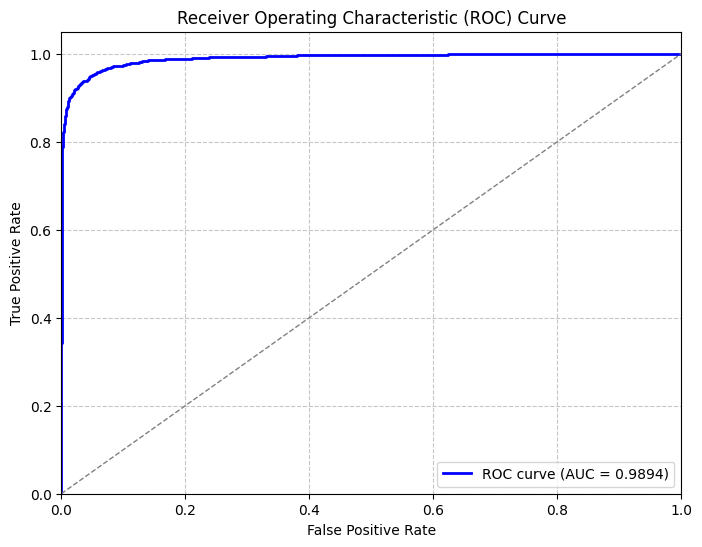

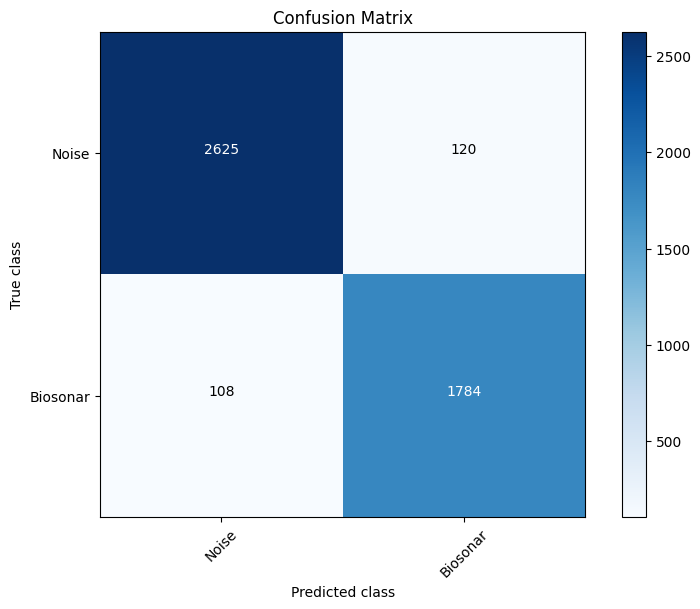

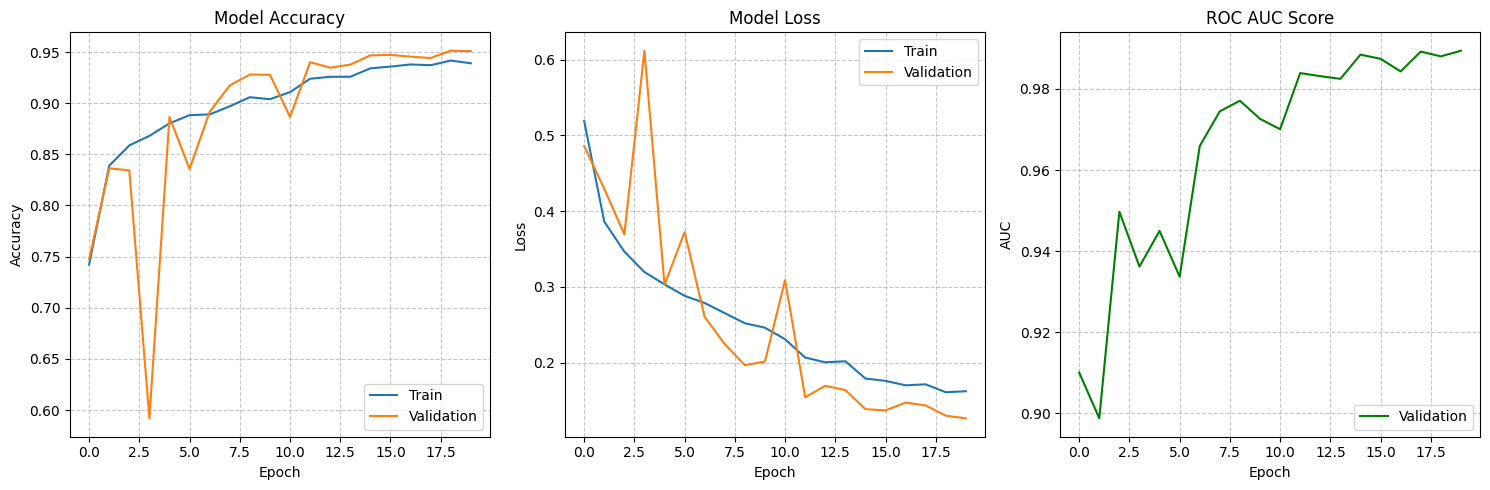


Loading test data...
Number of test samples: 950
Predicting on test data...


Prediction: 100%|██████████| 60/60 [00:46<00:00,  1.30it/s]


Submission file saved to /content/drive/MyDrive/Deep/submission.csv
Model saved as 'biosonar_detection_model.pth'


In [ ]:
warnings.filterwarnings('ignore')
set_seed(42)

train_df = pd.read_csv(Y_TRAIN_PATH)

file_ids = train_df['id'].values
labels = train_df['pos_label'].values.astype(int)

train_ids, val_ids, train_labels, val_labels = train_test_split(
    file_ids, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training set: {len(train_ids)} samples")
print(f"Validation set: {len(val_ids)} samples")

# Create datasets
train_dataset = CNN2DModelTrainer(
    file_ids=train_ids,
    labels=train_labels,
    is_train=True,
    augment=True,  # Use data augmentation for training
    preload=False,  # Set to True to load all data into memory
    folder_path=X_TRAIN_DOSSIER_PATH,
    sr=256000,     # Sampling rate
    duration=0.2,  # Audio duration
    n_fft=1024,    # FFT window size
    hop_length=128,# Hop length for STFT
    n_mels=128     # Number of mel bands
)

val_dataset = CNN2DModelTrainer(
    file_ids=val_ids,
    labels=val_labels,
    is_train=True,  # True because it's training data, not test
    augment=False,  # No augmentation for validation
    preload=False,
    folder_path=X_TRAIN_DOSSIER_PATH,
    sr=256000,
    duration=0.2,
    n_fft=1024,
    hop_length=128,
    n_mels=128
)

# Create data loaders
batch_size = 16
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=torch.cuda.is_available()
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=torch.cuda.is_available()
)

# Create the model
model = DCNN(dropout_rate=0.5)

# Initialize the trainer
trainer = DCNN_Trainer(
    model=model,
    learning_rate=0.001,
    batch_size=batch_size,
    epochs=20,
    patience=3  # Early stopping patience
)

# Train the model
history = trainer.train(train_loader, val_loader)

# Plot training history
plot_training_history(history)

# Load test data
test_files = [f for f in os.listdir(X_SUBMIT_DOSSIER_PATH) if f.endswith('.wav')]

test_dataset = CNN2DModelTrainer(
    file_ids=test_files,
    is_train=False,  # This is test data
    augment=False,   # No augmentation for test
    preload=False,
    folder_path=X_SUBMIT_DOSSIER_PATH,
    sr=256000,
    duration=0.2,
    n_fft=1024,
    hop_length=128,
    n_mels=128
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=torch.cuda.is_available()
)

# Predict on test data
predictions, file_ids = trainer.predict(test_loader)

# Create submission file
submission_df = pd.DataFrame({
    'File': file_ids,
    'pos_label': predictions
})

submission_df.to_csv(Y_SUBMIT_PATH, index=False)
print(f"Submission file saved to {Y_SUBMIT_PATH}")

# Save the model
trainer.save_model(
    'biosonar_model.pth',
    additional_info={
        'min_val': test_dataset.min_val,
        'max_val': test_dataset.max_val,
        'n_fft': 1024,
        'hop_length': 128,
        'n_mels': 128
    }
)

# To load the model later
new_model = DCNN()
new_trainer = DCNN_Trainer(new_model)
info = new_trainer.load_model('biosonar_model.pth')

print("Model loaded successfully!")
print("Additional information:", info)

Le score sur le site est 0,6474507428652867

